In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

/home/hugo/Documents/OpenClassRooms/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
explainer = pickle.load(open("explainer.pickle", "rb"))
df_train = pd.read_csv("df_train.csv")
features_names = [_col for _col in df_train.columns if _col != "TARGET"]
model = pickle.load(open("model.pickle", "rb"))

In [3]:
shap_values = explainer.shap_values(df_train.values)

  0%|          | 0/80 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC()

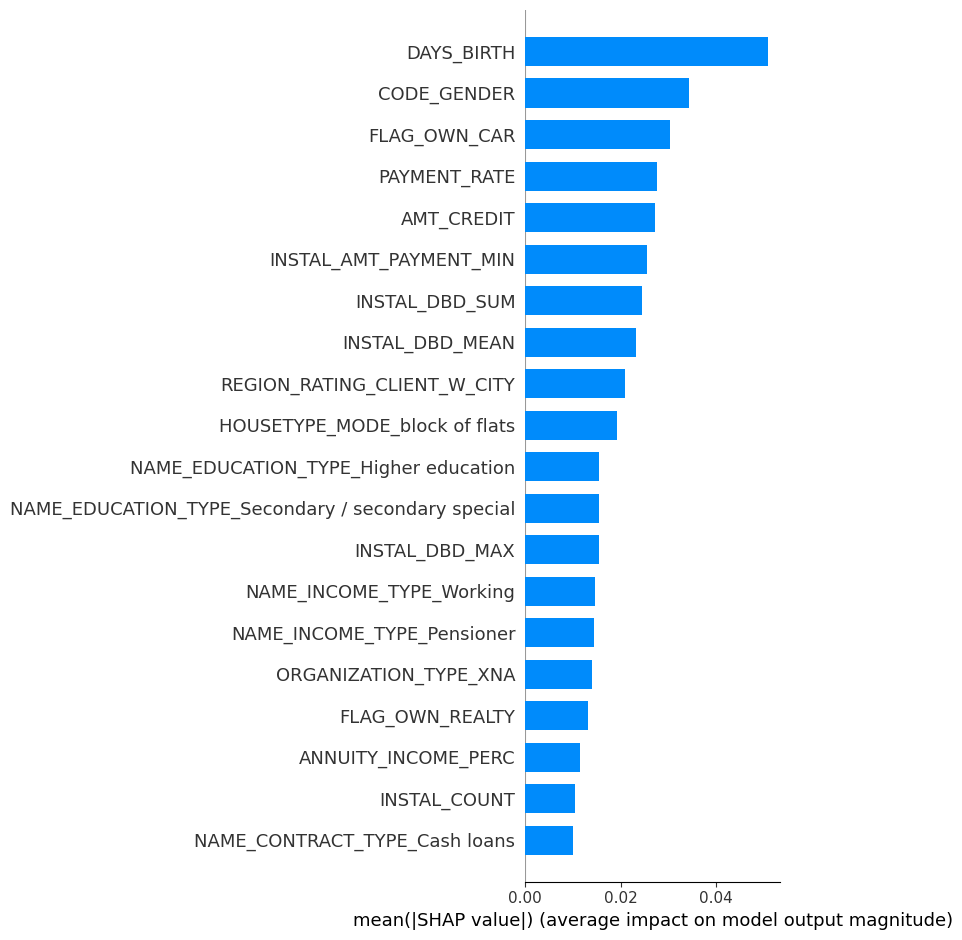

In [68]:
plt.figure(figsize=[12,6])
shap.summary_plot(shap_values, df_train.values, feature_names=features_names, plot_type="bar")
plt.show()

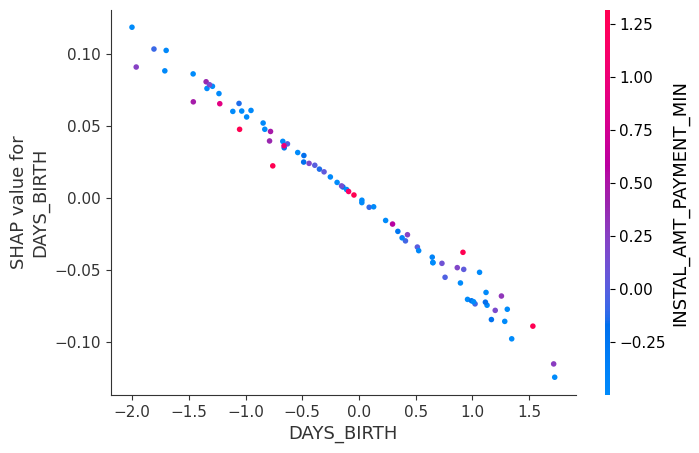

In [69]:
shap.dependence_plot(
    "DAYS_BIRTH",
    shap_values,
    df_train,
    features_names
)

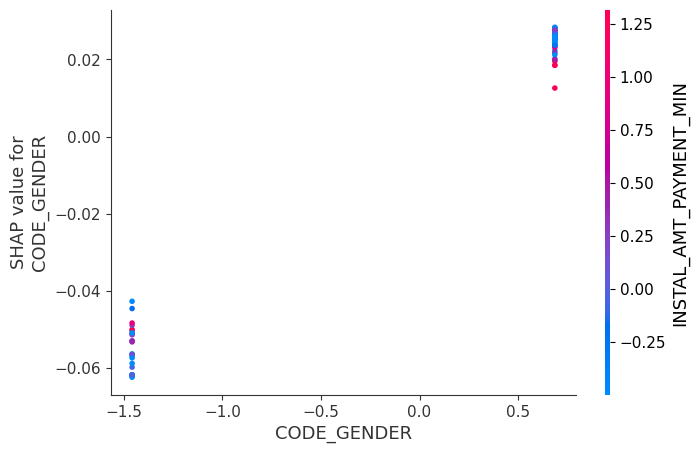

In [70]:
shap.dependence_plot(
    "CODE_GENDER",
    shap_values,
    df_train,
    features_names
)

In [66]:
shap.initjs()

In [60]:
shap_values = shap_values[0]

In [64]:
explainer.expected_value

array([0.69628478, 0.30371522])

In [67]:
shap.force_plot(base_value = explainer.expected_value[0],shap_values = shap_values[25,:], features = features_names)

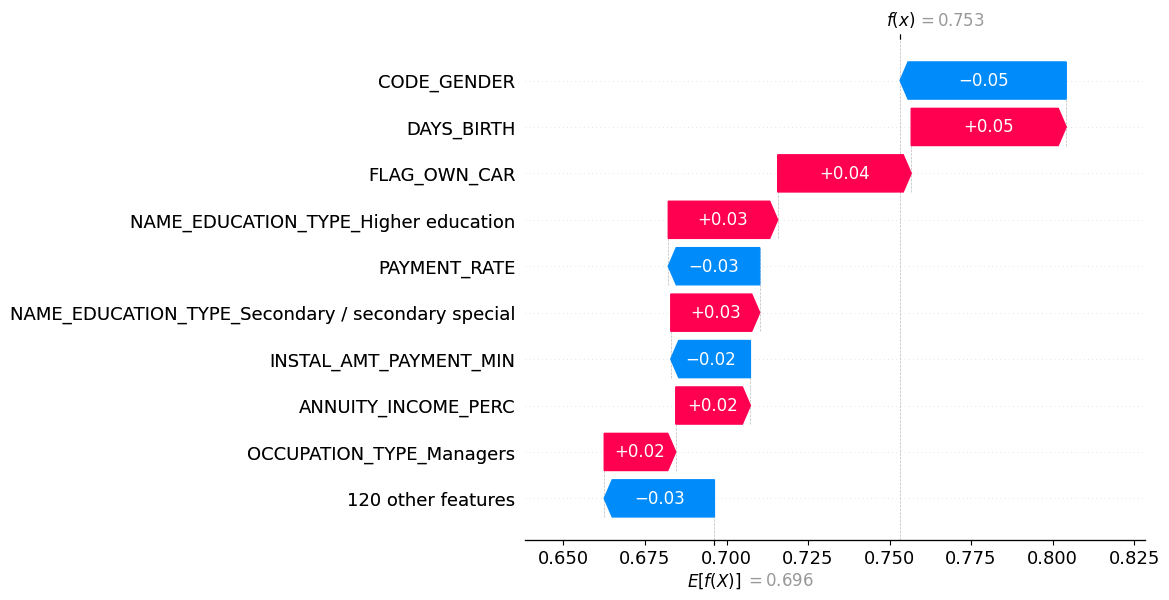

In [82]:
explanation = shap.Explanation(values = shap_values[25,:], base_values=explainer.expected_value[0], feature_names=features_names)
shap.plots.waterfall(explanation)

In [15]:
pickle.dump(shap_values, open("shap_values.pickle", "wb"))